### 화면 가로 확장

In [1]:
# 화면 가로 확장 코드 (기본 width 50%)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

### 모듈 임포트

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import tensorflow as tf
import csv
import os

### 3년치 데이터 합본 저장, 확인

In [3]:
df_3Y = pd.DataFrame()
for y in range(2013, 2016):
    file = './Combined_Data/'+str(y)+'_'+'House1_Ch1_Combined_Data_Y.csv'
    df_y= pd.read_csv(file, encoding='cp949')
    df_3Y = pd.concat([df_3Y, df_y])
    
df_3Y = df_3Y.drop([df_3Y.columns[0]], axis=1)
df_3Y = df_3Y.reset_index(drop=True)
df_3Y.to_csv("./Combined_Data/House1_Ch1_Combined_Data_13-15.csv", encoding='cp949')

In [4]:
Data_3Y = pd.read_csv('./Combined_Data/House1_Ch1_Combined_Data_13-15.csv', encoding='cp949')
Data_3Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26280 entries, 0 to 26279
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26280 non-null  int64  
 1   DateTime    26280 non-null  int64  
 2   Graph_Date  26280 non-null  object 
 3   Day         26280 non-null  object 
 4   Holiday     26280 non-null  int64  
 5   Seq         26280 non-null  int64  
 6   Watt        26280 non-null  int64  
 7   Temp        26280 non-null  float64
dtypes: float64(1), int64(5), object(2)
memory usage: 1.6+ MB


### 각 연도별 csv 데이터 로드

In [5]:
Data_2013=pd.read_csv('./Combined_Data/2013_House1_Ch1_Combined_Data_Y.csv', encoding='cp949')
Data_2014=pd.read_csv('./Combined_Data/2014_House1_Ch1_Combined_Data_Y.csv', encoding='cp949')
Data_2015=pd.read_csv('./Combined_Data/2015_House1_Ch1_Combined_Data_Y.csv', encoding='cp949')
Data_2016=pd.read_csv('./Combined_Data/2016_House1_Ch1_Combined_Data_Y.csv', encoding='cp949')

### Plt 그래프 함수

In [6]:
def Graph(name1, name2, year):
    # 1번째 그래프
    ax1 = plt.subplot(2, 1, 1)
    ax1.spines['left'].set_color('yellow')
    ax1.spines['left'].set_lw(2)
    ax1.spines['bottom'].set_color('yellow')
    ax1.spines['bottom'].set_lw(2)

    ax1.tick_params(axis='x', colors='white', size=10)
    ax1.tick_params(axis='x', colors='white', labelsize=15)
    ax1.tick_params(axis='y', colors='white', size=10)
    ax1.tick_params(axis='y', colors='white', labelsize=15)

    plt.plot(x, y1, '.-', color='y', linewidth=1)
    plt.title(name1, fontdict=font_head, pad=20)
    plt.xticks(visible=False)
    plt.ylabel('Watt',labelpad=15, fontdict=font_body)

    # 2번째 그래프
    ax2 = plt.subplot(2, 1, 2, sharex=ax1)
    ax2.spines['left'].set_color('blue')
    ax2.spines['left'].set_lw(2)
    ax2.spines['bottom'].set_color('blue')
    ax2.spines['bottom'].set_lw(2)

    ax2.tick_params(axis='x', colors='white', size=10)
    ax2.tick_params(axis='x', colors='white', labelsize=15)
    ax2.tick_params(axis='y', colors='white', size=10)
    ax2.tick_params(axis='y', colors='white', labelsize=15)

    plt.plot(x, y2, '.-', color='b', linewidth=1)
    plt.title(name2, fontdict=font_head, pad=20)
    plt.xlabel('Time',labelpad=15, fontdict=font_body)
    plt.ylabel('Temp',labelpad=15, fontdict=font_body)
    
    if year==1:
        plt.xticks([0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334], labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    if year==3:
        plt.xticks([0, 365, 730], labels=['2013', '2014', '2015'])
        
    plt.tight_layout()
    plt.show()

#### 13년도 그래프 확인

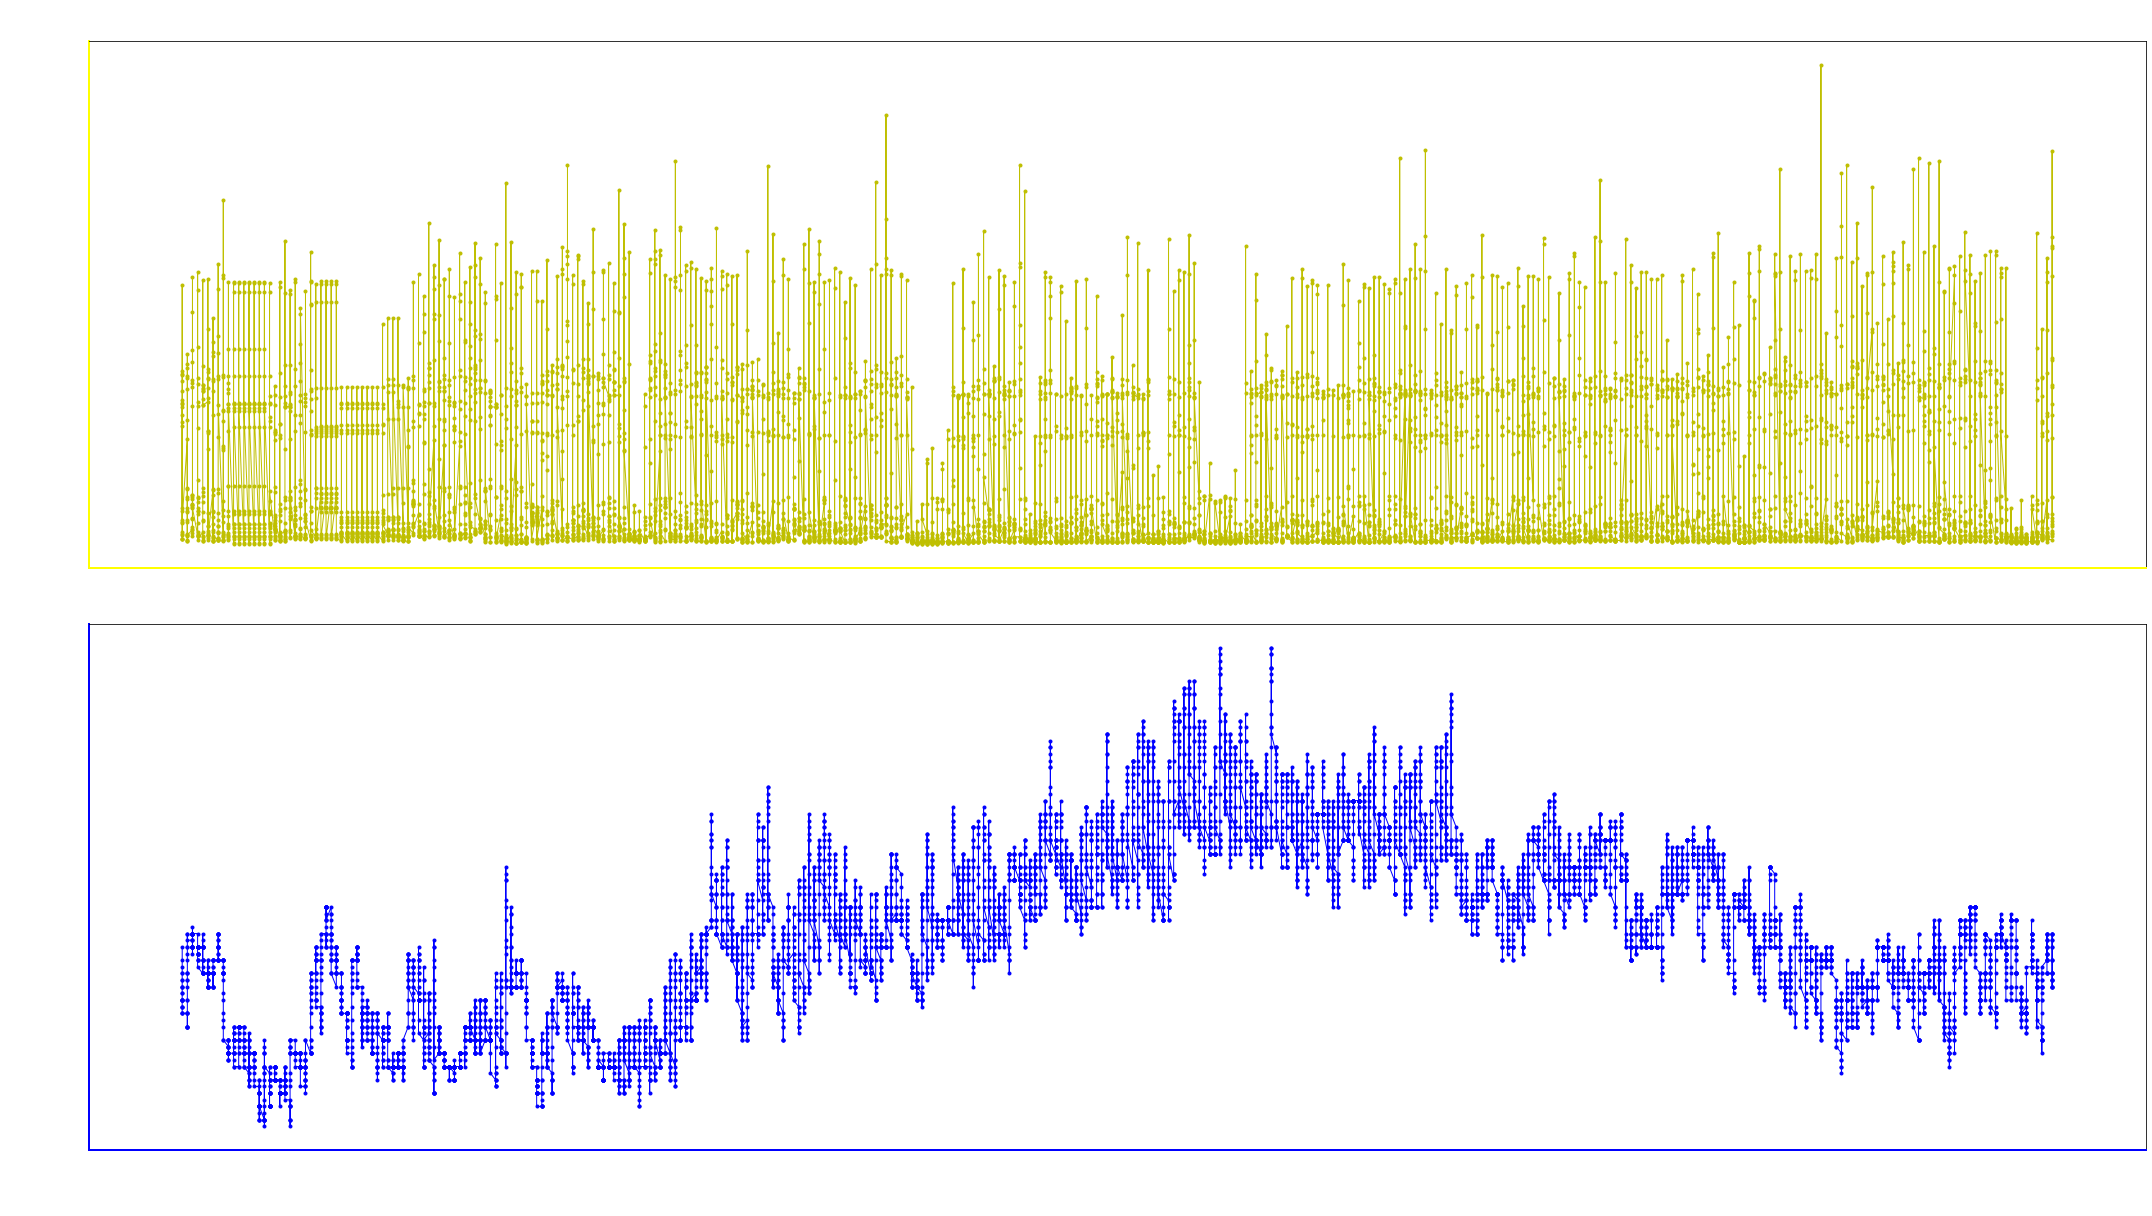

In [7]:
x = Data_2013['Graph_Date']

y1 = Data_2013['Watt']
y2 = Data_2013['Temp']
plt.figure(figsize=(30,17))
font_head = {'color': 'w', 'weight': 'bold', 'size': 20}
font_body = {'color': 'w', 'weight': 'bold', 'size': 15}

Graph("2013's Time-Watt Graph", "2013's Time-Temp Graph", 1)

#### 3년치 데이터 그래프 확인

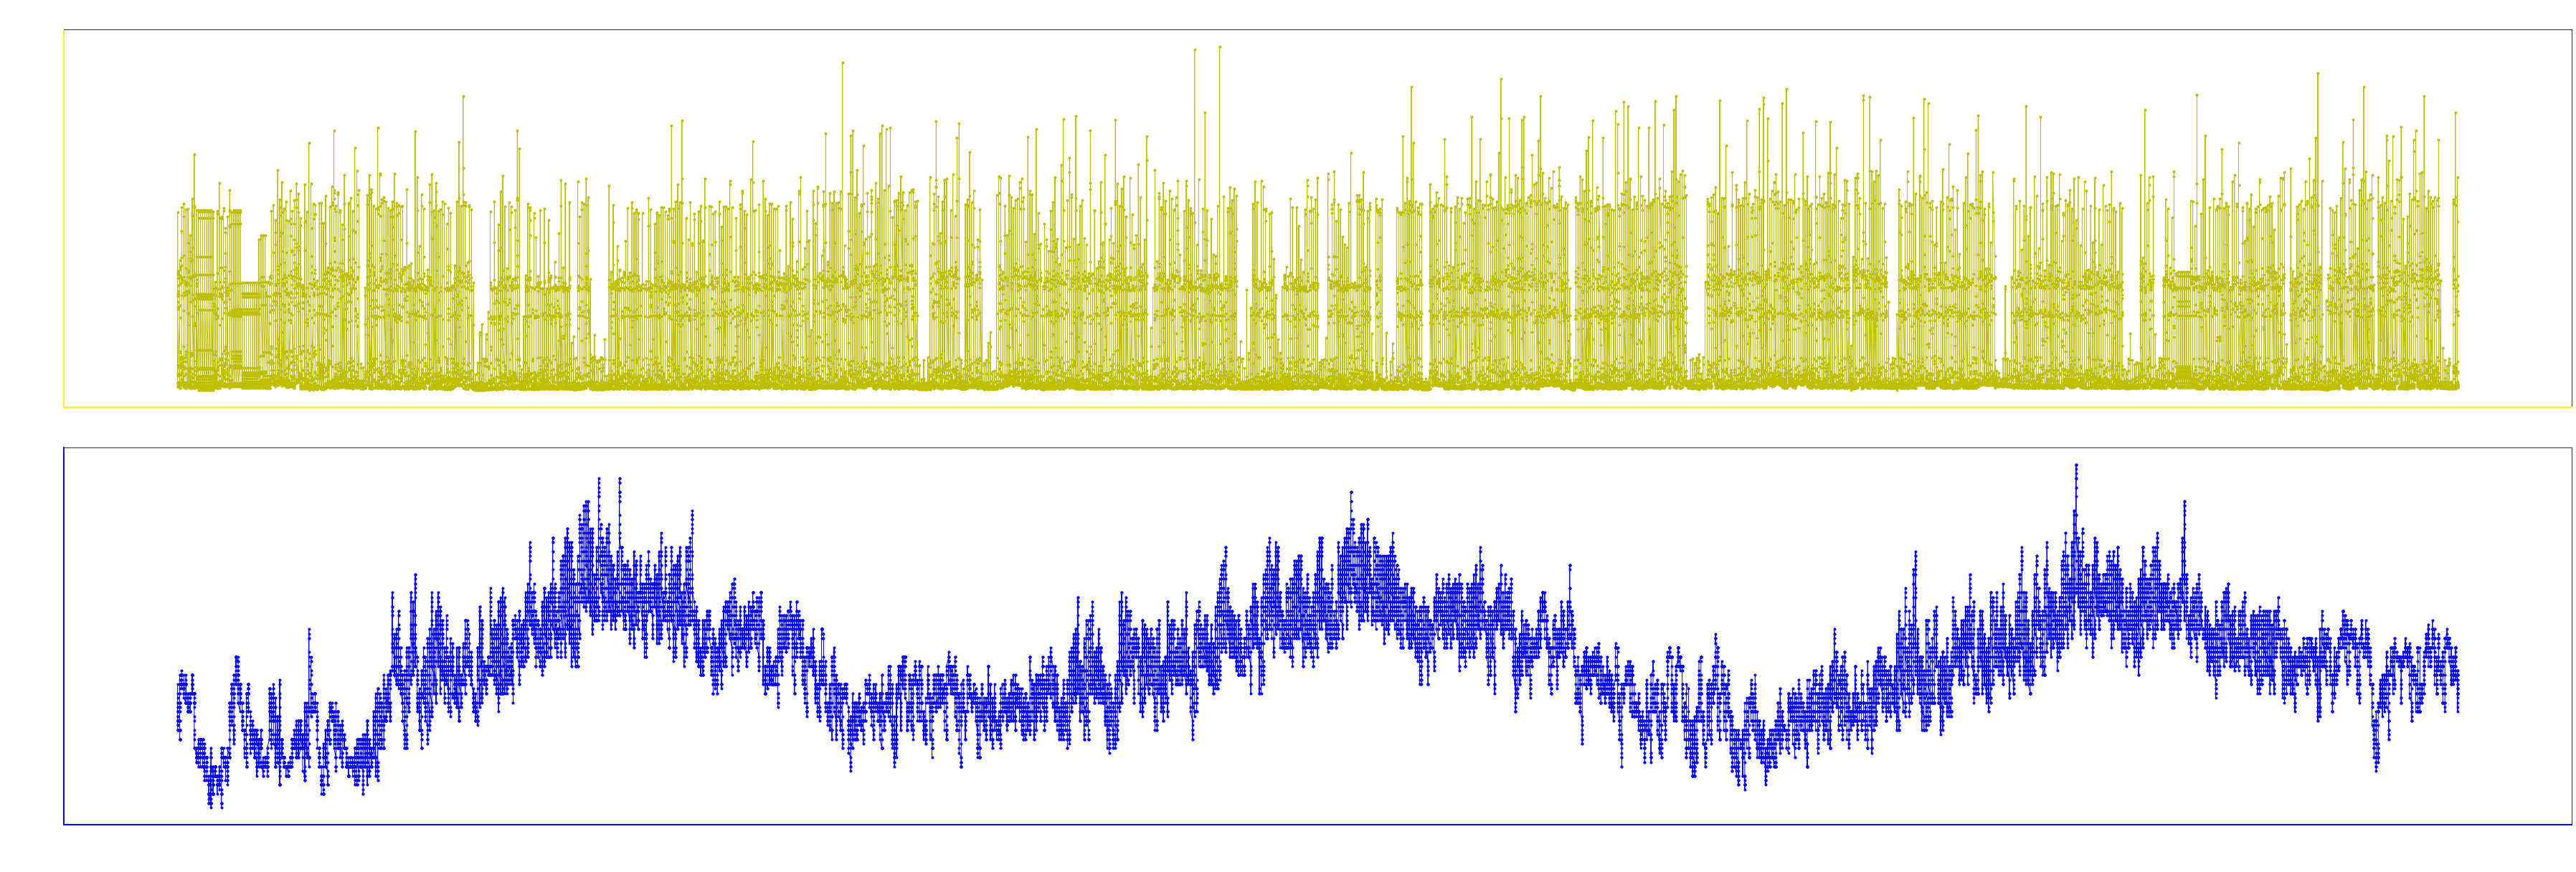

In [8]:
x = Data_3Y['Graph_Date']

y1 = Data_3Y['Watt']
y2 = Data_3Y['Temp']
plt.figure(figsize=(50,17))
font_head = {'color': 'w', 'weight': 'bold', 'size': 20}
font_body = {'color': 'w', 'weight': 'bold', 'size': 15}

Graph("13-15's Time-Watt Graph","13-15's Time-Temp Graph", 3)

### 데이터 정규화

#### Train Set 3년치 정규화

In [59]:
from sklearn.preprocessing import MinMaxScaler

Data_3Y.sort_index(ascending=False).reset_index(drop=True)

scaler = MinMaxScaler()
scale_cols = ['Holiday', 'Watt', 'Temp']
Data_3Y_scaled = scaler.fit_transform(Data_3Y[scale_cols])
Data_3Y_scaled = pd.DataFrame(Data_3Y_scaled)
Data_3Y_scaled.columns = scale_cols

Data_3Y_scaled.insert(0, 'DateTime', Data_3Y['DateTime'])
Data_3Y_scaled.insert(1, 'Graph_Date', Data_3Y['Graph_Date'])
Data_3Y_scaled

,DateTime,Graph_Date,Holiday,Watt,Temp
0,20130101,2013-01-01,1.0,0.280670,0.360000
1,20130101,2013-01-01,1.0,0.279092,0.333333
2,20130101,2013-01-01,1.0,0.274117,0.320000
3,20130101,2013-01-01,1.0,0.010072,0.306667
4,20130101,2013-01-01,1.0,0.009465,0.306667
...,...,...,...,...,...
26275,20151231,2015-12-31,0.0,0.308094,0.333333
26276,20151231,2015-12-31,0.0,0.230191,0.320000
26277,20151231,2015-12-31,0.0,0.050237,0.306667
26278,20151231,2015-12-31,0.0,0.054969,0.293333


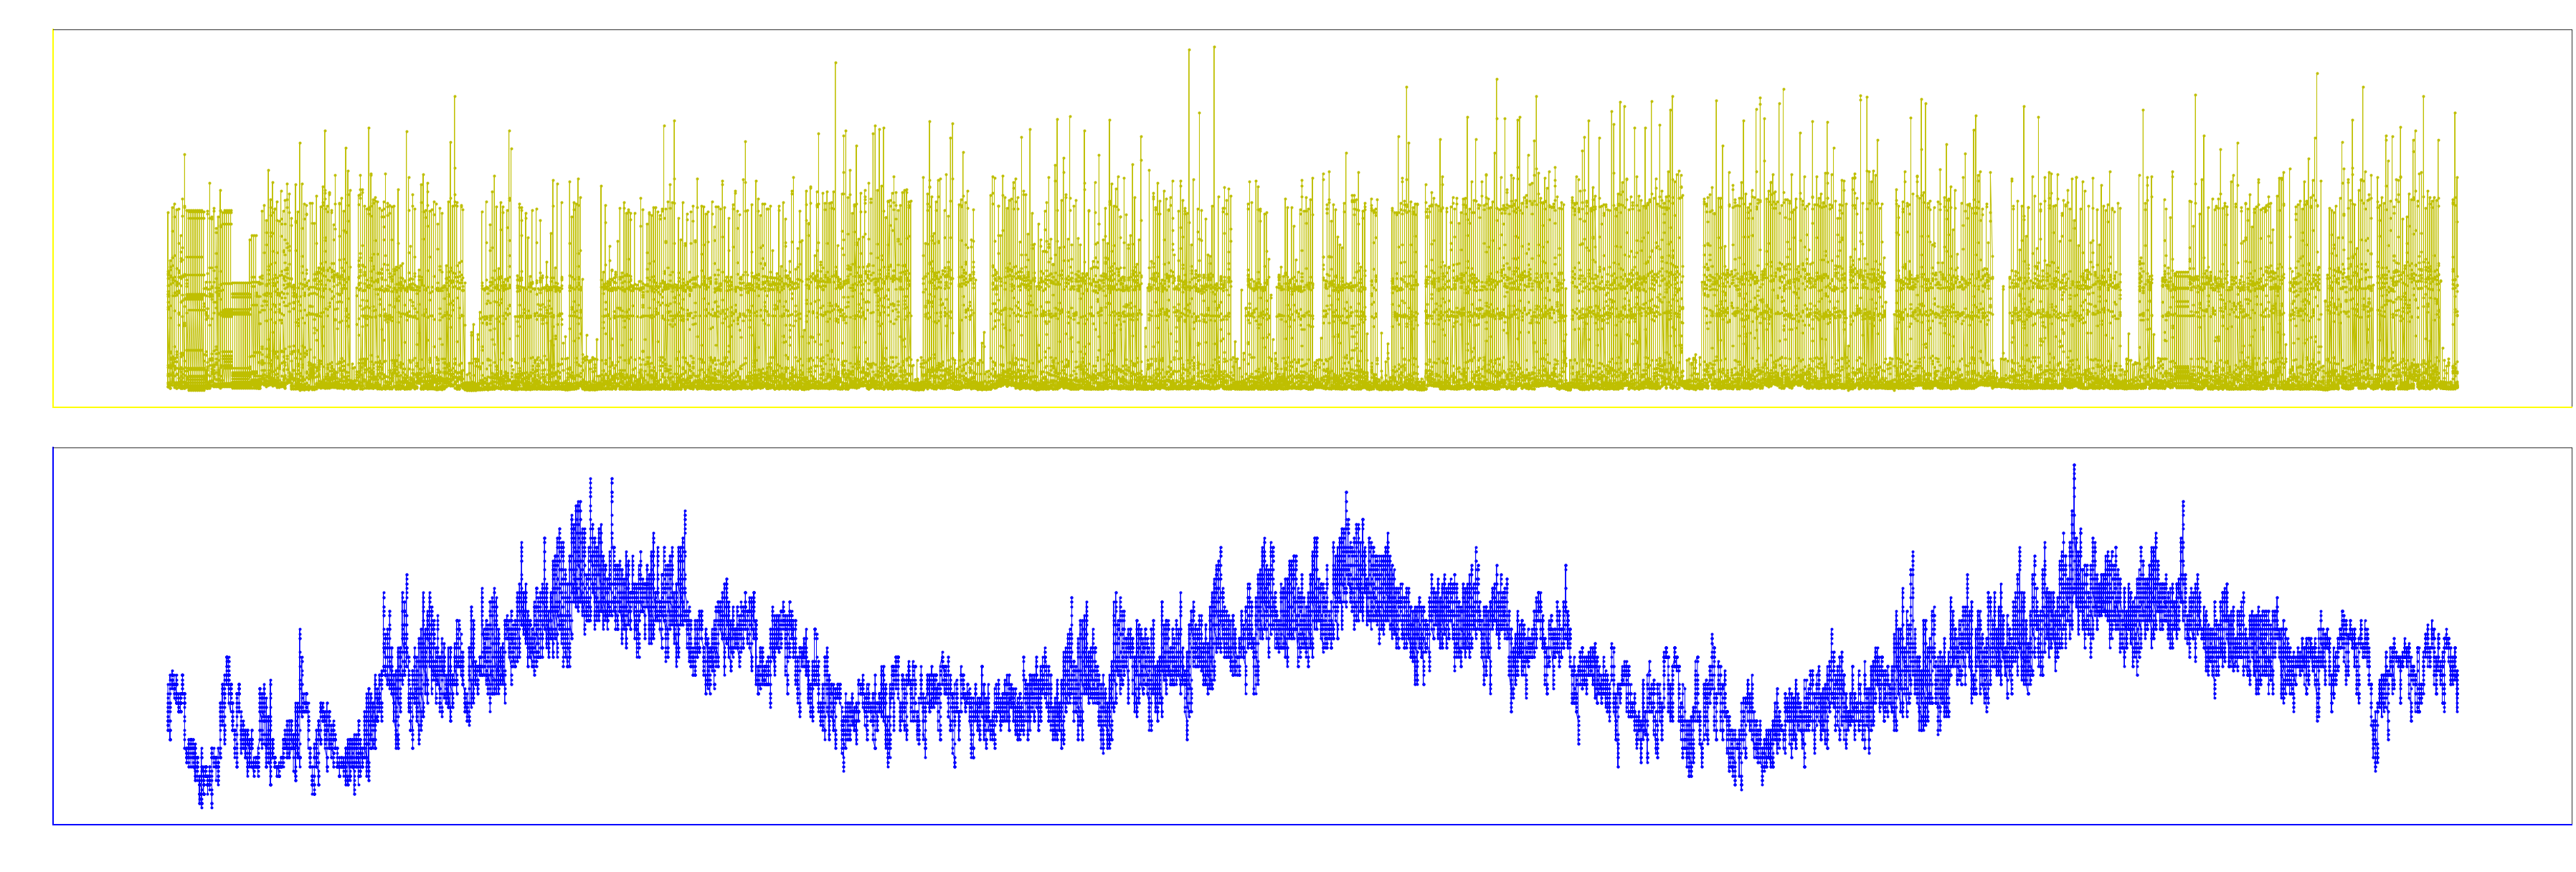

In [60]:
x = Data_3Y_scaled['Graph_Date']

y1 = Data_3Y_scaled['Watt']
y2 = Data_3Y_scaled['Temp']
plt.figure(figsize=(50,17))
font_head = {'color': 'w', 'weight': 'bold', 'size': 20}
font_body = {'color': 'w', 'weight': 'bold', 'size': 15}

Graph("13-15's Scaled Time-Watt Graph","13-15's Scaled Time-Temp Graph", 3)

#### Test Set 1년치 정규화

In [11]:
Data_2016.sort_index(ascending=False).reset_index(drop=True)

scaler = MinMaxScaler()
scale_cols = ['Holiday', 'Watt', 'Temp']
Data_2016_scaled = scaler.fit_transform(Data_2016[scale_cols])
Data_2016_scaled = pd.DataFrame(Data_2016_scaled)
Data_2016_scaled.columns = scale_cols

#Data_2016_scaled=Data_2016_scaled.reset_index()
Data_2016_scaled.insert(0, 'DateTime', Data_2016['DateTime'])
Data_2016_scaled.insert(1, 'Graph_Date', Data_2016['Graph_Date'])
Data_2016_scaled

,DateTime,Graph_Date,Holiday,Watt,Temp
0,20160101,2016-01-01,1.0,0.278738,0.220588
1,20160101,2016-01-01,1.0,0.018443,0.205882
2,20160101,2016-01-01,1.0,0.016355,0.176471
3,20160101,2016-01-01,1.0,0.009976,0.176471
4,20160101,2016-01-01,1.0,0.006960,0.176471
...,...,...,...,...,...
8755,20161231,2016-12-31,1.0,0.024707,0.294118
8756,20161231,2016-12-31,1.0,0.182809,0.294118
8757,20161231,2016-12-31,1.0,0.089781,0.264706
8758,20161231,2016-12-31,1.0,0.049878,0.264706


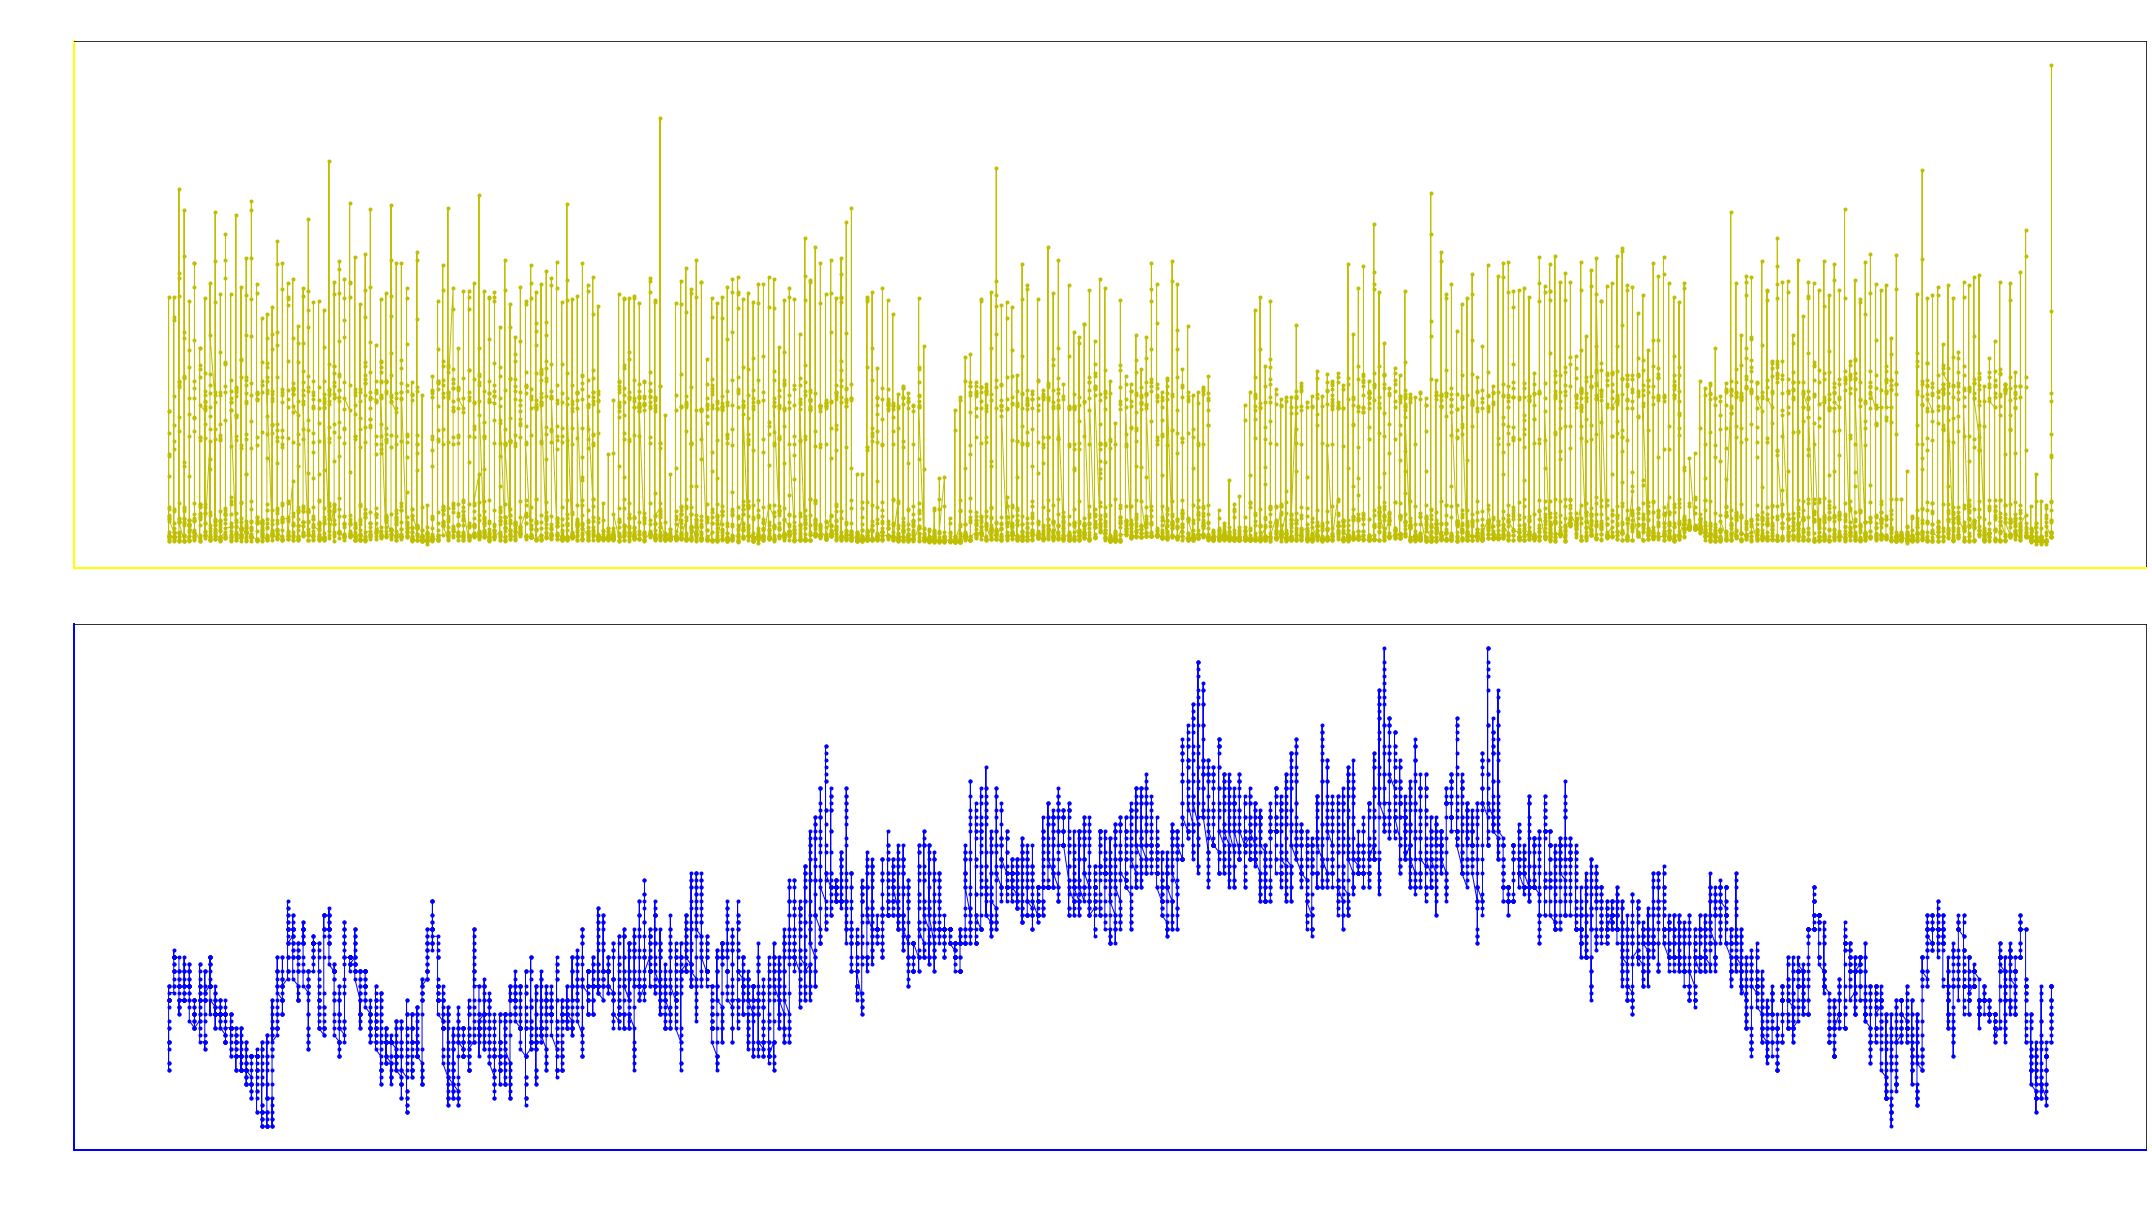

In [12]:
x = Data_2016_scaled['Graph_Date']

y1 = Data_2016_scaled['Watt']
y2 = Data_2016_scaled['Temp']
plt.figure(figsize=(30,17))
font_head = {'color': 'w', 'weight': 'bold', 'size': 20}
font_body = {'color': 'w', 'weight': 'bold', 'size': 15}

Graph("2016's Scaled Time-Watt Graph","2016's Scaled Time-Temp Graph", 1)

### 데이터셋 편집

#### 3Y 데이터 분할, Reshape-1안

In [37]:
# seed 값 설정 -> 배포시 동일한 값을 위해서는 고정할 필요가 있음.
seed=0
np.random.seed(seed)
tf.random.set_seed(3)

# X, Y 데이터 설정
X = Data_3Y_scaled.iloc[:, [0,2,3]].astype(float)
Y = Data_3Y_scaled.iloc[:, [0,4,3]].astype(float)

In [38]:
from sklearn.model_selection import train_test_split

# 데이터 분할
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.333, random_state=seed)

x_train_r=x_train.values.reshape(-1,3)
x_val_r=x_val.values.reshape(-1,3)
y_train_r=y_train.values.reshape(-1,3)
y_val_r=y_val.values.reshape(-1,3)


In [40]:
x_train_r

array([[2.01310210e+07, 0.00000000e+00, 4.52614974e-02],
       [2.01505040e+07, 1.00000000e+00, 2.28006310e-01],
       [2.01509140e+07, 0.00000000e+00, 2.95352506e-01],
       ...,
       [2.01402150e+07, 1.00000000e+00, 1.65028516e-02],
       [2.01403260e+07, 0.00000000e+00, 3.20349472e-02],
       [2.01304240e+07, 0.00000000e+00, 1.39788861e-01]])

In [52]:
x_train_r= np.reshape(x_train_r,(x_train_r.shape[0], x_train_r.shape[1], 1))
x_val_r= np.reshape(x_val_r,(x_val_r.shape[0], x_val_r.shape[1], 1))
y_train_r= np.reshape(y_train_r,(y_train_r.shape[0], y_train_r.shape[1], 1))
y_val_r= np.reshape(y_val_r,(y_val_r.shape[0], y_val_r.shape[1], 1))

In [53]:
x_train_r

array([[[2.01310210e+07],
        [0.00000000e+00],
        [4.52614974e-02]],

       [[2.01505040e+07],
        [1.00000000e+00],
        [2.28006310e-01]],

       [[2.01509140e+07],
        [0.00000000e+00],
        [2.95352506e-01]],

       ...,

       [[2.01402150e+07],
        [1.00000000e+00],
        [1.65028516e-02]],

       [[2.01403260e+07],
        [0.00000000e+00],
        [3.20349472e-02]],

       [[2.01304240e+07],
        [0.00000000e+00],
        [1.39788861e-01]]])

In [112]:
"""
x_train_r= np.reshape(x_train_r,(x_train_r.shape[0], 1, x_train_r.shape[1]))
x_val_r= np.reshape(x_val_r,(x_val_r.shape[0], 1, x_val_r.shape[1]))
y_train_r= np.reshape(y_train_r,(y_train_r.shape[0], 1, y_train_r.shape[1]))
y_val_r= np.reshape(y_val_r,(y_val_r.shape[0], 1, y_val_r.shape[1]))
"""

#### 2016 테스트셋 Reshape

In [106]:
x_test_r = Data_2016_scaled.iloc[:, [0,2,4]].values.reshape(-1,3)
y_test_r = Data_2016_scaled.iloc[:, [0,3]].values.reshape(-1,3)

In [107]:
"""
x_test_r= np.reshape(x_test_r,(x_test_r.shape[0], 1, x_test_r.shape[1]))
y_test_r= np.reshape(y_test_r,(y_test_r.shape[0], 1, y_test_r.shape[1]))
"""

'\nx_test_r= np.reshape(x_test_r,(x_test_r.shape[0], 1, x_test_r.shape[1]))\ny_test_r= np.reshape(y_test_r,(y_test_r.shape[0], 1, y_test_r.shape[1]))\n'

In [108]:
# 여기서 입력용 파이프라인을 위해 셔플 과정을 추가할 수도 있음. 이전 RNN 파일 참고

In [109]:
# 교차 검증과 하이퍼 파라미터 튜닝도 고려

#### 3Y 데이터 분할, Reshape-2안

In [64]:
TEST_SIZE = 365
WINDOW_SIZE = 30

train = Data_3Y_scaled[:-TEST_SIZE]
val = Data_3Y_scaled[-TEST_SIZE:]

In [65]:
def make_dataset(data, label, window_size=30):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [66]:
from sklearn.model_selection import train_test_split

feature_cols = ['DateTime', 'Holiday', 'Watt', 'Temp']
label_cols = ['Watt']

train_feature = train[feature_cols]
train_label = train[label_cols]

train_feature, train_label = make_dataset(train_feature, train_label, 30)

x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)
x_train.shape, x_valid.shape

((20708, 30, 4), (5177, 30, 4))

In [ ]:
##########################################################  여기서부터 재개

### 네트워크 설계

In [47]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional

#### 1안

In [48]:
(x_train_r.shape[0], 1)

(17528, 1)

In [58]:
model = Sequential()
model.add(LSTM(128, activation='LeakyReLU', dropout=0.3, return_sequences = True, input_shape = (x_train_r.shape[1], 1)))
model.add(LSTM(256, activation='LeakyReLU', dropout=0.3, return_sequences = True))
model.add(LSTM(256, activation='LeakyReLU', dropout=0.3, return_sequences = False))
model.add(Dense(1, activation='softmax'))
model.compile(tf.keras.optimizers.Nadam(0.001), loss ='mean_squared_error', metrics=['accuracy'])
model.fit(x_train_r, y_train_r, epochs = 30, batch_size = 64)

Epoch 1/30
274/274 [==============================] - 15s 46ms/step - loss: 135215452258304.0000 - accuracy: 3.8034e-05
Epoch 2/30
274/274 [==============================] - 12s 45ms/step - loss: 135215527755776.0000 - accuracy: 3.8034e-05
Epoch 3/30
 40/274 [===>..........................] - ETA: 10s - loss: 135218161778688.0000 - accuracy: 0.0000e+00

KeyboardInterrupt: 

#### 2안

In [123]:
model = Sequential()
#tf.keras.layers.LSTM
model.add(LSTM(100, dropout=0.3, activation='tanh', input_shape = (3, 1), recurrent_activation='sigmoid',return_sequences=True))
#model.add(Bidirectional(LSTM(64)))
model.add(LSTM(100, dropout=0.3, activation='tanh', recurrent_activation='sigmoid', return_sequences=False))
model.add(Dense(1, activation='tanh')) # activation sigmoid도 가능?
# 손실함수 중 카테고리컬은 원핫인코딩 적용시 사용
model.compile(loss='binary_crossentropy', optimizer='Nadam', metrics=['accuracy'])
model.fit(x_train_r, y_train_r, batch_size=128, epochs=30, validation_data=[x_val_r, y_val_r])

Epoch 1/30
137/137 [==============================] - ETA: 0s - loss: 103556240.0000 - accuracy: 3.8034e-05

ValueError: in user code:

    C:\Users\Hwi\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1323 test_function  *
        return step_function(self, iterator)
    C:\Users\Hwi\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1314 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Hwi\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Hwi\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Hwi\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Hwi\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1307 run_step  **
        outputs = model.test_step(data)
    C:\Users\Hwi\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1266 test_step
        y_pred = self(x, training=False)
    C:\Users\Hwi\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\Hwi\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:200 assert_input_compatibility
        raise ValueError('Layer ' + layer_name + ' expects ' +

    ValueError: Layer sequential_23 expects 1 input(s), but it received 2 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(None, 3, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:1' shape=(None, 3, 1) dtype=float32>]


In [ ]:
model.summary

#### 3안